In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.decomposition import PCA
import glob
import string

# for visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.svm import SVC, NuSVC

import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.options.display.max_rows = 200
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


/var/folders/kw/dchp08qs3lqgjzpc8kwkl5xr0000gn/T/ipykernel_86618/1775542155.py:24: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


# Import Datasets

In [35]:
missing_values = ["n/a", "na", "--", "", "XNA", "Unknown", "unknown"]
df_app = pd.read_csv("archive/application_data.csv", na_values=missing_values)
df_prev = pd.read_csv("archive/previous_application.csv", na_values=missing_values)


In [38]:
df_prev["SK_ID_CURR"].nunique()

338857

In [25]:
set(df_app.columns.tolist())&set(df_prev.columns.tolist())

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START'}

In [33]:


df_joined = pd.merge(df_app, df_prev, on="SK_ID_CURR", how="inner", sort=True)
df_joined.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
df_joined.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
print((df_joined["AMT_CREDIT_x"] == df_joined["AMT_CREDIT_y"]).astype(int).sum())


print("Shape of application data: ", df_app.shape)
print("Shape of previous application data: ", df_prev.shape)
print("Shape of joined data: ", df_joined.shape)


894
Shape of application data:  (307511, 122)
Shape of previous application data:  (1670214, 37)
Shape of joined data:  (291057, 158)


In [4]:
df_joined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,NaN,XAP,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartmen

In [5]:
df_joined.describe().applymap(lambda x: f'{x:.1f}' if isinstance(x, (int, float)) else x)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,291057.0,291057.0,291057.0,291057.0,291057.0,291045.0,290790.0,291057.0,291057.0,291057.0,291057.0,291057.0,98496.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,127218.0,290477.0,233869.0,141697.0,119202.0,147424.0,96188.0,86495.0,134227.0,142835.0,144548.0,92315.0,116754.0,90852.0,143308.0,87732.0,128794.0,141697.0,119202.0,147424.0,96188.0,86495.0,134227.0,142835.0,144548.0,92315.0,116754.0,90852.0,143308.0,87732.0,128794.0,141697.0,119202.0,147424.0,96188.0,86495.0,134227.0,142835.0,144548.0,92315.0,116754.0,90852.0,143308.0,87732.0,128794.0,148893.0,290283.0,290283.0,290283.0,290283.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,291057.0,251723.0,251723.0,251723.0,251723.0,251723.0,251723.0,291057.0,244669.0,291057.0,291057.0,174176.0,242096.0,291057.0,291057.0,174176.0,1589.0,1589.0,291057.0,291057.0,244672.0,208405.0,208405.0,208405.0,208405.0,208405.0,208405.0
mean,278217.8,0.1,0.4,167129.4,590904.1,26990.8,530523.9,0.0,-16050.9,64029.9,-4994.8,-2992.3,12.3,1.0,0.8,0.2,1.0,0.3,0.1,2.2,2.1,2.0,12.0,0.0,0.0,0.0,0.1,0.2,0.2,0.5,0.5,0.5,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,1.4,0.1,1.4,0.1,-996.4,0.0,0.7,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,2.0,2379167.7,14264.8,153893.4,169956.1,7124.9,185028.4,12.7,1.0,0.1,0.2,0.8,-912.3,417.4,14.2,345368.5,11297.0,28047.1,

<h1>EDA</h1>

## - Data Shape

The combined dataset consists of 291057 observations, and 158 features.


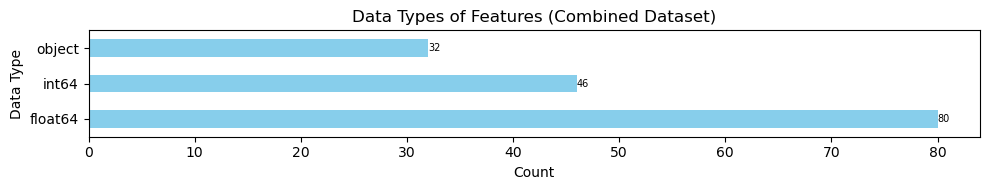

In [11]:
dTypesCount_joined = df_joined.dtypes.value_counts()
print(f"The combined dataset consists of {df_joined.shape[0]} observations, and {df_joined.shape[1]} features.")

dTypesCount_joined.plot(kind='barh', color='skyblue', figsize=(10, 2))
for index, value in enumerate(dTypesCount_joined):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=7)
plt.title("Data Types of Features (Combined Dataset)")
plt.xlabel("Count")
plt.ylabel("Data Type")

plt.tight_layout()
plt.show()

## - Missing Values Percentage Per Column

Number of columns with missing values in the combined dataset: 92 out of 158, with average missing percentage of 41.50%
Number of columns with >=40% missing values: 56


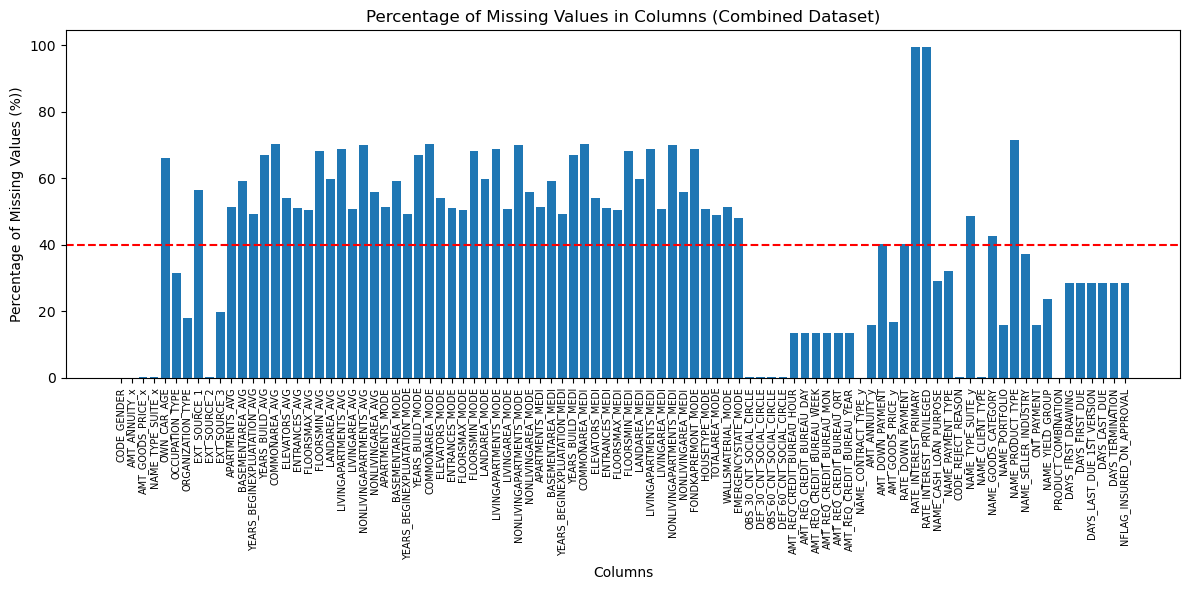

In [13]:
total = df_joined.shape[0]

missing_in_col_cnt = {}
missing_in_col_per = {}
for col in df_joined.columns:
    missing_in_col_cnt[col] = df_joined[col].isnull().sum()
    missing_in_col_per[col] = (missing_in_col_cnt[col] / total) * 100

columns_with_missing = {col: percent for col, percent in missing_in_col_per.items() if percent > 0}

print(f"Number of columns with missing values in the combined dataset: {len(columns_with_missing)} out of {len(df_joined.columns)}, with average missing percentage of {np.mean(list(columns_with_missing.values())):.2f}%")
print(f"Number of columns with >=40% missing values: {len([percent for percent in columns_with_missing.values() if percent >= 40])}")
x = columns_with_missing.keys()
y = columns_with_missing.values()
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation='vertical', fontsize = 7)

plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%))')
plt.title('Percentage of Missing Values in Columns (Combined Dataset)')
plt.axhline(40, ls='--',color='red')
plt.tight_layout()
plt.show()

## - Gender Distribution

There are 3 gender values, ['M' 'F' nan] 


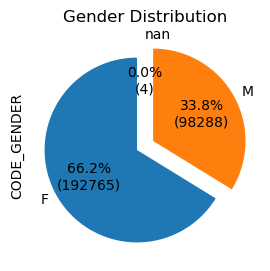

F      192765
M      98288 
NaN    4     
Name: CODE_GENDER, dtype: int64


In [14]:
# format count with percentages
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(genders)*x/100)

genders = df_joined['CODE_GENDER']
unique_genders = genders.unique()
print(f"There are {len(unique_genders)} gender values, {unique_genders} ")
genders.value_counts(dropna=False).plot.pie(figsize=(3,3), autopct=my_fmt, startangle=90, explode=(0.1,0.1,0.1))
plt.title("Gender Distribution")
plt.show()
print(genders.value_counts(dropna=False))

## - Car Ownership

Car ownership flag can have 2 values, ['N' 'Y'] 
Only 33.84% of all people own a car.


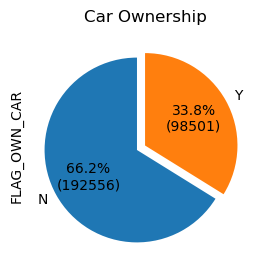

N    192556
Y    98501 
Name: FLAG_OWN_CAR, dtype: int64


In [15]:
# format count with percentages
def my_fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(cars) * x / 100)

cars = df_joined["FLAG_OWN_CAR"]
unique_cars = cars.unique()
print(f"Car ownership flag can have {len(unique_cars)} values, {unique_cars} ")
print(f"Only {round(cars.value_counts()[1] * 100 / len(cars),2)}% of all people own a car.")
cars.value_counts(dropna=False).plot.pie(figsize=(3, 3), autopct=my_fmt, startangle=90, explode = (0.1,0))
plt.title("Car Ownership")
plt.show()
print(cars.value_counts(dropna=False))

## - Region Rating vs Target

/var/folders/kw/dchp08qs3lqgjzpc8kwkl5xr0000gn/T/ipykernel_86618/1121784433.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])


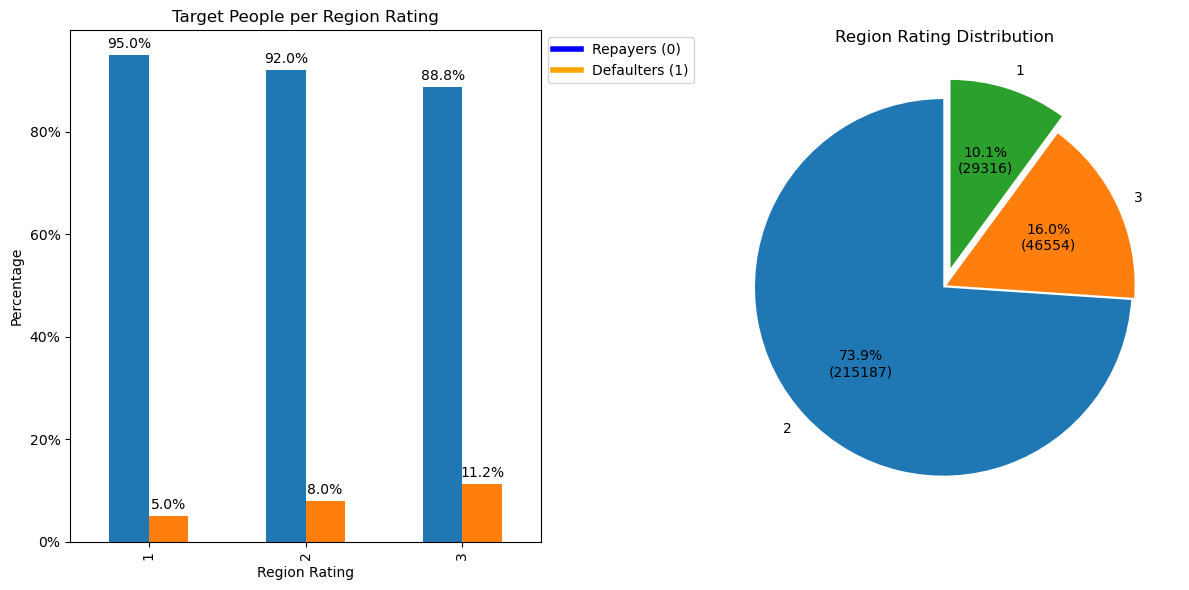

In [17]:
# format count with percentages
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(regions)*x/100)

regions = df_joined['REGION_RATING_CLIENT']
grouped = df_joined.groupby('REGION_RATING_CLIENT')['TARGET'].value_counts(normalize=True).unstack() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

grouped.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_xlabel('Region Rating')
ax1.set_ylabel('Percentage')
ax1.set_title('Target People per Region Rating')
accepted_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Repayers (0)')
unaccepted_patch = plt.Line2D([0], [0], color='orange', lw=4, label='Defaulters (1)')
ax1.legend(handles=[accepted_patch, unaccepted_patch], loc='upper left', bbox_to_anchor=(1, 1))

for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        ax1.annotate('{:.1f}%'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])

region_rating_counts = df_joined['REGION_RATING_CLIENT'].value_counts()
ax2.pie(region_rating_counts, labels=region_rating_counts.index, autopct=my_fmt, startangle=90, explode = (0.01,0.01,0.1))
ax2.set_title('Region Rating Distribution')

plt.tight_layout()
plt.show()



## - Income Analysis

/var/folders/kw/dchp08qs3lqgjzpc8kwkl5xr0000gn/T/ipykernel_86618/3079719082.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])


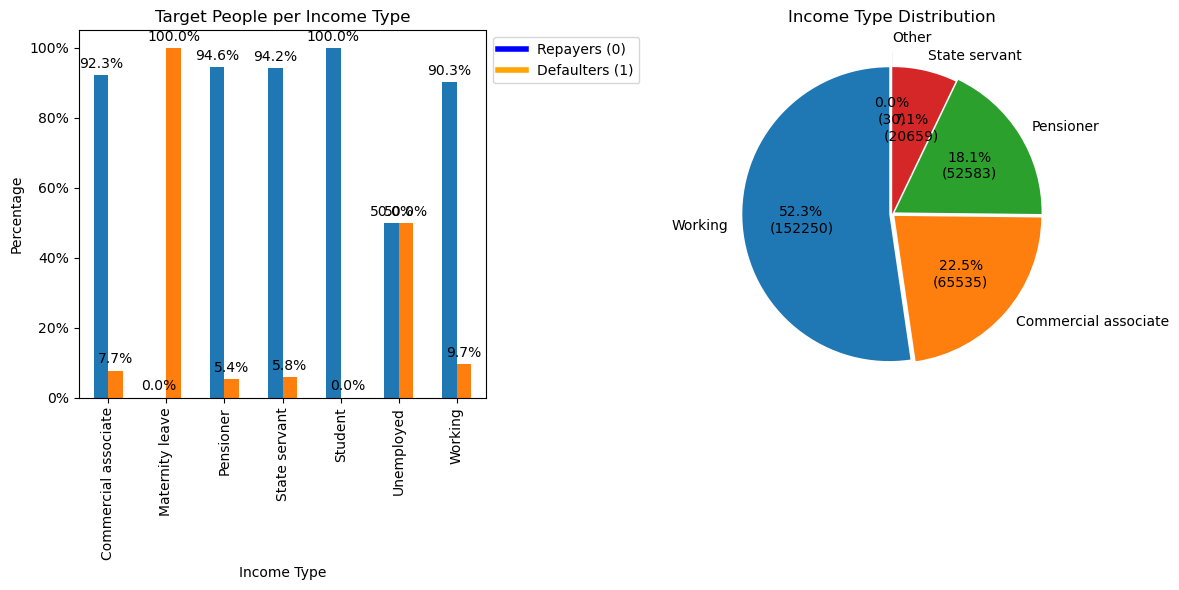

In [18]:
# format count with percentages
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(income_types)*x/100)
income_types = df_joined['NAME_INCOME_TYPE']

grouped = df_joined.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True).unstack() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

grouped.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_xlabel('Income Type')
ax1.set_ylabel('Percentage')
ax1.set_title('Target People per Income Type')
accepted_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Repayers (0)')
unaccepted_patch = plt.Line2D([0], [0], color='orange', lw=4, label='Defaulters (1)')
ax1.legend(handles=[accepted_patch, unaccepted_patch], loc='upper left', bbox_to_anchor=(1, 1))

for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        ax1.annotate('{:.1f}%'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])

work_type_counts = df_joined['NAME_INCOME_TYPE'].value_counts()
s = work_type_counts.sum()
other_indicies = []
other = 0
for x in range(len(work_type_counts)):
    work_type_counts[x] = work_type_counts[x] / s * 100
    if work_type_counts[x] < 1:
        other += work_type_counts[x]
        other_indicies.append(work_type_counts.index[x])
p = work_type_counts.drop(other_indicies, inplace=False)
p['Other'] = other

ax2.pie(p, labels=p.index, autopct=my_fmt, startangle=90, explode = (0.02,0.02,0.02,0,0.1))
ax2.set_title('Income Type Distribution')

plt.tight_layout()
plt.show()



There are 0  null values in AMT_INCOME_TOTAL column.
There are 12328 outliers in AMT_INCOME_TOTAL column.


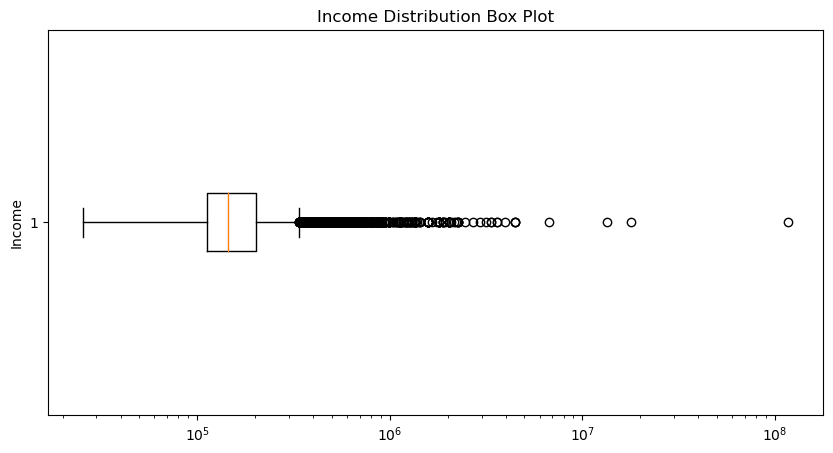

count    291057.0   
mean     167129.4   
std      240070.5   
min      25650.0    
25%      112500.0   
50%      144000.0   
75%      202500.0   
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: object


In [19]:
income = df_joined["AMT_INCOME_TOTAL"]
print(f"There are {df_joined['AMT_INCOME_TOTAL'].isna().sum()}  null values in AMT_INCOME_TOTAL column.")

iqr = income.quantile(0.75) - income.quantile(0.25)
upper_whisker = income.quantile(0.75) + 1.5*iqr
print(f"There are {len(income[income > upper_whisker])} outliers in AMT_INCOME_TOTAL column.")


plt.figure(figsize=(10, 5))
plt.boxplot(income, vert = False)
plt.title("Income Distribution Box Plot")
plt.ylabel("Income")
plt.xscale("log")
plt.show()

print(income.describe().apply(lambda x: f'{x:.1f}' if isinstance(x, (int, float)) else x))

In [20]:
annuity = df_joined["AMT_ANNUITY"].dropna()
print(f"There are {df_joined['AMT_ANNUITY'].isna().sum()}  null values in AMT_ANNUITY column.")

iqr = annuity.quantile(0.75) - annuity.quantile(0.25)
upper_whisker = annuity.quantile(0.75) + 1.5*iqr
print(f"There are {len(annuity[annuity > upper_whisker])} outliers in AMT_ANNUITY column.")

plt.figure(figsize=(10, 5))
plt.boxplot(annuity, vert = False)
plt.title("Loan Annuity Distribution Box Plot")
plt.ylabel("Loan Annuity Amount")
# plt.xscale("log")
plt.show()
print(annuity.describe().apply(lambda x: f'{x:.1f}' if isinstance(x, (int, float)) else x))


KeyError: 'AMT_ANNUITY'

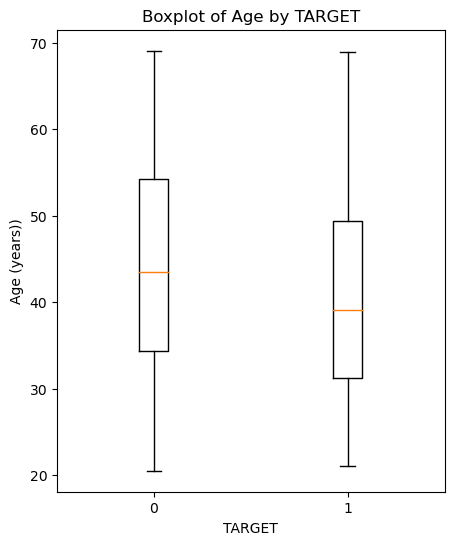

In [495]:
age_in_years = df_app['DAYS_BIRTH'].apply(lambda x: abs(x)/365.25)  

plt.figure(figsize=(5, 6))
plt.boxplot([age_in_years[df_app['TARGET'] == 0], age_in_years[df_app['TARGET'] == 1]], labels=['0', '1'])
plt.xlabel('TARGET')
plt.ylabel('Age (years))')
plt.title('Boxplot of Age by TARGET')
plt.show()

## - Correlation Matrices

### - Contact Info vs Target

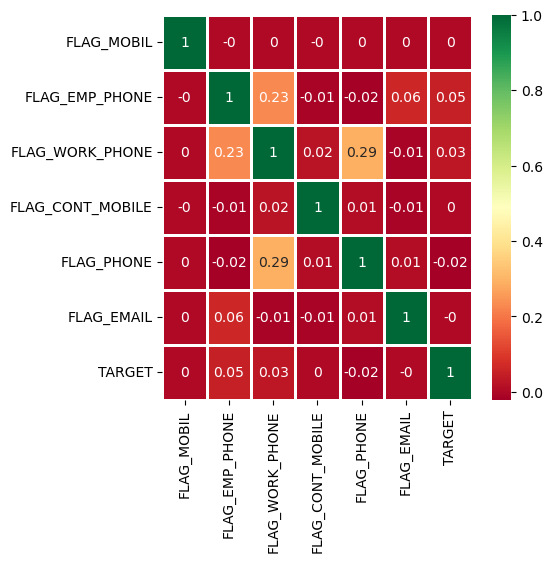

In [496]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = df_app[contact_col].corr().round(2)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)
plt.show()

### - Documents Submission vs Target

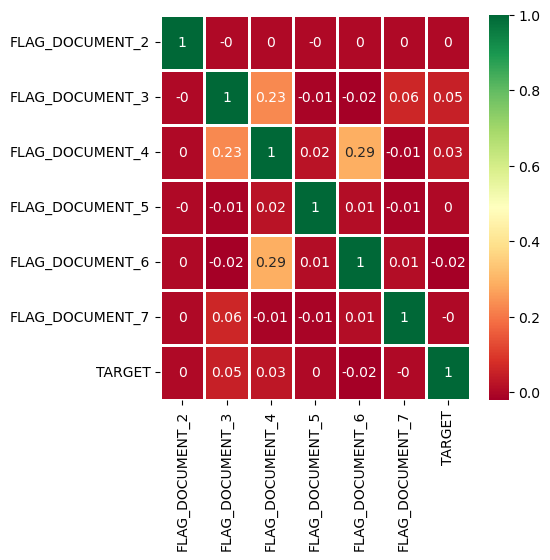

In [497]:
documents_cols = [
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    # "FLAG_DOCUMENT_8",
    # "FLAG_DOCUMENT_9",
    # "FLAG_DOCUMENT_10",
    # "FLAG_DOCUMENT_11",
    # "FLAG_DOCUMENT_12",
    # "FLAG_DOCUMENT_13",
    # "FLAG_DOCUMENT_14",
    # "FLAG_DOCUMENT_15",
    # "FLAG_DOCUMENT_16",
    # "FLAG_DOCUMENT_17",
    # "FLAG_DOCUMENT_18",
    # "FLAG_DOCUMENT_19",
    # "FLAG_DOCUMENT_20",
    # "FLAG_DOCUMENT_21",
    "TARGET"
]
docs_corr = df_app[documents_cols].corr().round(2)
# print(docs_corr["FLAG_DOCUMENT_2"])
fig = plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    Contact_corr,
    xticklabels=docs_corr.columns,
    yticklabels=docs_corr.columns,
    annot=True,
    cmap="RdYlGn",
    linewidth=1,
)
plt.show()

# Dropping Unnecassary Features

## - Drop columns with >=40% missing values.

In [501]:
total = df_app.shape[0]
df_app_new = df_app.copy()
missing_in_col_cnt = {}
missing_in_col_per = {}
for col in df_app_new.columns:
    missing_in_col_cnt[col] = df_app_new[col].isnull().sum()
    missing_in_col_per[col] = (missing_in_col_cnt[col] / total) * 100
columns_with_missing = {col: percent for col, percent in missing_in_col_per.items() if percent >= 40}
missing_cols_names = list(columns_with_missing.keys())
df_app_new.drop(missing_cols_names, axis=1, inplace=True)
print("For Application Data file:")
print("Total number of columns before dropping: ", len(df_app.columns))
print(f"Dropped {len(missing_cols_names)} columns with more than 40% missing values.")
print(f"Total number of columns after dropping: {len(df_app_new.columns)}")
print(f"Number of numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Number of object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

For Application Data file:
Total number of columns before dropping:  122
Dropped 49 columns with more than 40% missing values.
Total number of columns after dropping: 73
Number of numeric columns: 61
Number of object columns: 12


In [502]:
total = df_prev.shape[0]
df_prev_new = df_prev.copy()
missing_in_col_cnt = {}
missing_in_col_per = {}
for col in df_prev_new.columns:
    missing_in_col_cnt[col] = df_prev_new[col].isnull().sum()
    missing_in_col_per[col] = (missing_in_col_cnt[col] / total) * 100
columns_with_missing = {col: percent for col, percent in missing_in_col_per.items() if percent >= 40}
missing_cols_names = list(columns_with_missing.keys())
df_prev_new.drop(missing_cols_names, axis=1, inplace=True)
print("For Application Data file:")
print(f"Total number of columns before dropping: {len(df_prev.columns)}")
print(f"Dropped {len(missing_cols_names)} columns with more than 40% missing values.")
print(f"Total number of columns after dropping: {len(df_prev_new.columns)}")
print(f"Number of numeric columns: {len(df_prev_new.select_dtypes(include=np.number).columns)}")
print(f"Number of object columns: {len(df_prev_new.select_dtypes(include=['object']).columns)}")

For Application Data file:
Total number of columns before dropping: 37
Dropped 11 columns with more than 40% missing values.
Total number of columns after dropping: 26
Number of numeric columns: 11
Number of object columns: 15


## - Check abnormal null values manually in remaining object types:

<p style="color:green"> Found ['Unknown'] in NAME_FAMILY_STATUS column. Added "Unknown", "unknown" in null-like values while importing. </p>

In [306]:
print(len(df_app_new.select_dtypes(include=['object']).columns))
for col in df_app_new.columns:
    if df_app_new[col].dtype == "object":
        print(col, df_app_new[col].dropna().unique())

12
NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Sec

## - Drop columns with no correlation to Target feature

In [539]:
print(f"Total number of columns before dropping: {len(df_app_new.columns)}")
print(f"Numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

# print(abs(df_app_new.select_dtypes(include=np.number).corr().round(2)["TARGET"]).sort_values(ascending=False))

corr_threshold = 0.05
uncorrelated_cols = []
for col in df_app_new.columns:
    if df_app_new[col].dtype == "object":
        continue
    elif abs(df_app_new['TARGET'].corr(df_app_new[col])) < corr_threshold:
        uncorrelated_cols.append(col)

print(f"\nNumber of uncorrelated numeric columns to the Target variable (corr <{corr_threshold}): {len(uncorrelated_cols)} out of {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Total Number of columns after dropping: {len(df_app_new.columns)}")
print(f"Numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

Total number of columns before dropping: 73
Numeric columns: 61
Object columns: 12

Number of uncorrelated numeric columns to the Target variable (corr <0.05): 52 out of 61
Total Number of columns after dropping: 73
Numeric columns: 61
Object columns: 12
